In [1]:
import pyedflib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
from sklearn.ensemble import IsolationForest

In [2]:
def read_edf_to_dataframe(file_path):
    # Чтение EDF файла
    f = pyedflib.EdfReader(file_path)
    n_signals = f.signals_in_file           # Получаем количество каналов в файле
    df = pd.DataFrame()

    for i in range(n_signals):              # Цикл по всем каналам
        signal = f.readSignal(i)
        label = f.getLabel(i)
        df[label] = signal                  # Добавляем канал в DataFrame с соответствующей меткой

    start_datetime = f.getStartdatetime()   # Получаем дату и время начала записи
    periods = df.shape[0]                   # Получаем количество строк в DataFrame (количество отсчетов)
    freq_sec = pd.to_timedelta(1000 / f.getSampleFrequencies()[0], unit='ms') # Вычисляем период дискретизации в миллисекундах и преобразуем в timedelta
    idx = pd.date_range(start=start_datetime, periods=periods, freq=freq_sec) # Создаем временной индекс
    df['timestamp'] = idx

    f.close()
    return df

def get_sampling_rate(file_path):
    f = pyedflib.EdfReader(file_path)
    sampling_rate = f.getSampleFrequencies()[0] # # Частота дискретизации (берем первую, предполагая, что все сигналы имеют одинаковую частоту)
    f.close()
    return sampling_rate

file_path = r"C:\Users\abely\Downloads\datasets\marked\19_ЩЕНН.edf"
dataframe = read_edf_to_dataframe(file_path)
sampling_rate = get_sampling_rate(file_path)

# Определение начала и конца записи
start_time = dataframe['timestamp'].iloc[0]
end_time = dataframe['timestamp'].iloc[-1]
print(f"Начало записи: {start_time}")
print(f"Конец записи: {end_time}")

ecg_channel = 'ECG V5-Ref' 
ecg_data = dataframe[ecg_channel].values

# # Процессинг ЭКГ
# ecg_cleaned = nk.ecg_clean(ecg_data, sampling_rate=sampling_rate)
# signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=sampling_rate)
# r_peaks = info['ECG_R_Peaks']

Начало записи: 2010-12-27 14:27:51
Конец записи: 2010-12-27 15:56:50.995000


**10 секунд обычно достаточно, чтобы врач или специалист мог оценить сердечный ритм, определить частоту сердечных сокращений и выявить возможные аритмии. Иногда может потребоваться более длительная запись, особенно для выявления периодически возникающих проблем, но стандартное обследование часто проводится в пределах нескольких секунд.**

In [3]:
dataframe

,ECG V2-Ref,ECG V5-Ref,ECG avF-Ref,timestamp
0,-0.02,-0.01,-0.01,2010-12-27 14:27:51.000
1,-0.03,-0.05,-0.03,2010-12-27 14:27:51.005
2,-0.05,-0.09,-0.05,2010-12-27 14:27:51.010
3,-0.06,-0.15,-0.04,2010-12-27 14:27:51.015
4,-0.05,-0.17,-0.07,2010-12-27 14:27:51.020
...,...,...,...,...
1067995,-0.09,-0.18,0.25,2010-12-27 15:56:50.975
1067996,-0.12,-0.17,0.25,2010-12-27 15:56:50.980
1067997,-0.10,-0.20,0.19,2010-12-27 15:56:50.985
1067998,-0.11,-0.21,0.18,2010-12-27 15:56:50.990


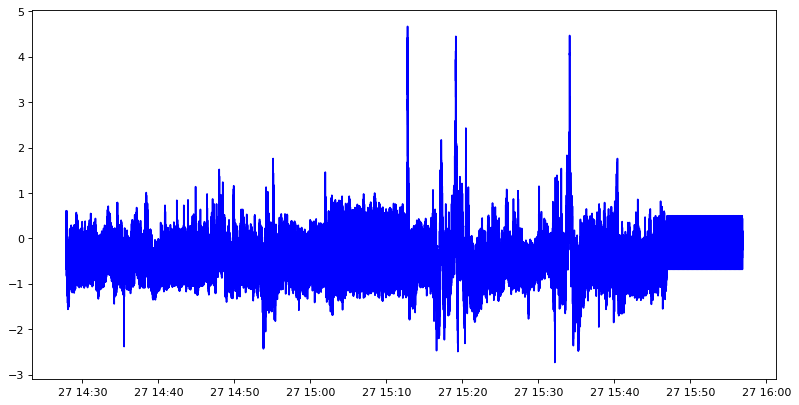

In [4]:
df_V5 = dataframe[['ECG V5-Ref', 'timestamp']]
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(df_V5['timestamp'], df_V5['ECG V5-Ref'], label='Value', color='blue')

C:\Users\abely\AppData\Local\Temp\ipykernel_5260\4025650114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V5['timestamp'] = pd.to_datetime(df_V5['timestamp'])


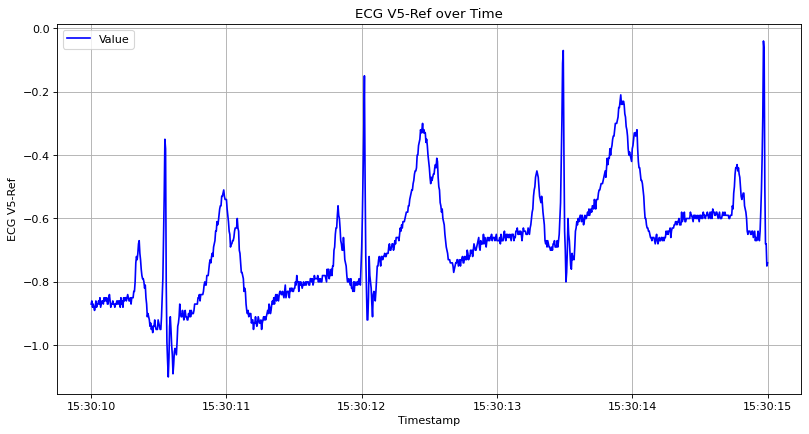

In [5]:
df_V5['timestamp'] = pd.to_datetime(df_V5['timestamp'])

# Задайте начальную и конечную дату фильтрации
start_date = '2010-12-27 15:30:10'
end_date = '2010-12-27 15:30:15'

# Фильтрация данных по диапазону дат
filtered_df = df_V5.loc[(df_V5['timestamp'] >= start_date) & (df_V5['timestamp'] <= end_date), ['ECG V5-Ref', 'timestamp']]

# Построение графика для отфильтрованных данных
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(filtered_df['timestamp'], filtered_df['ECG V5-Ref'], label='Value', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('ECG V5-Ref')
plt.title('ECG V5-Ref over Time')
plt.legend()
plt.grid(True)
plt.show()

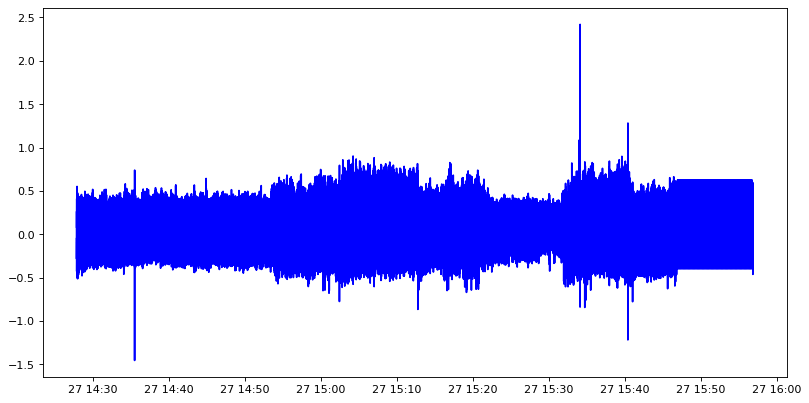

In [6]:
df_V5_cleaned = df_V5.copy()
df_V5_cleaned['ECG V5-Ref_cleaned'] = nk.ecg_clean(df_V5['ECG V5-Ref'], sampling_rate=sampling_rate)

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(df_V5_cleaned['timestamp'], df_V5_cleaned['ECG V5-Ref_cleaned'], label='Value', color='blue')


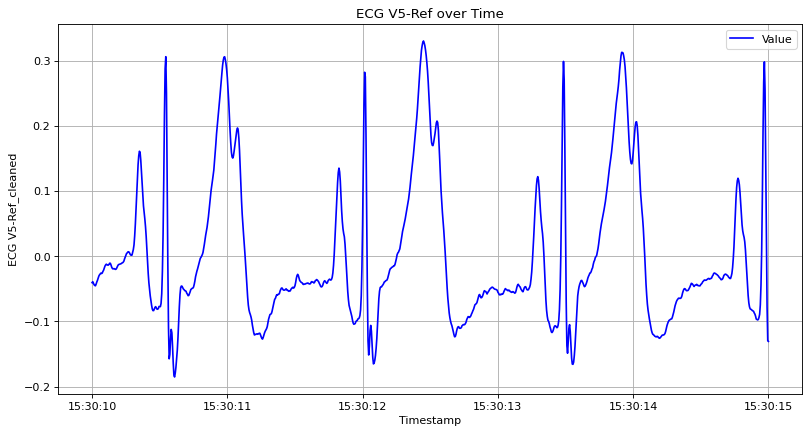

In [7]:
df_V5_cleaned['timestamp'] = pd.to_datetime(df_V5_cleaned['timestamp'])

# Задайте начальную и конечную дату фильтрации
start_date = '2010-12-27 15:30:10'
end_date = '2010-12-27 15:30:15'

# Фильтрация данных по диапазону дат
filtered_df_cleaned = df_V5_cleaned.loc[(df_V5_cleaned['timestamp'] >= start_date) & (df_V5_cleaned['timestamp'] <= end_date), ['ECG V5-Ref_cleaned', 'timestamp']]

# Построение графика для отфильтрованных данных
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(filtered_df_cleaned['timestamp'], filtered_df_cleaned['ECG V5-Ref_cleaned'], label='Value', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('ECG V5-Ref_cleaned')
plt.title('ECG V5-Ref over Time')
plt.legend()
plt.grid(True)
plt.show()

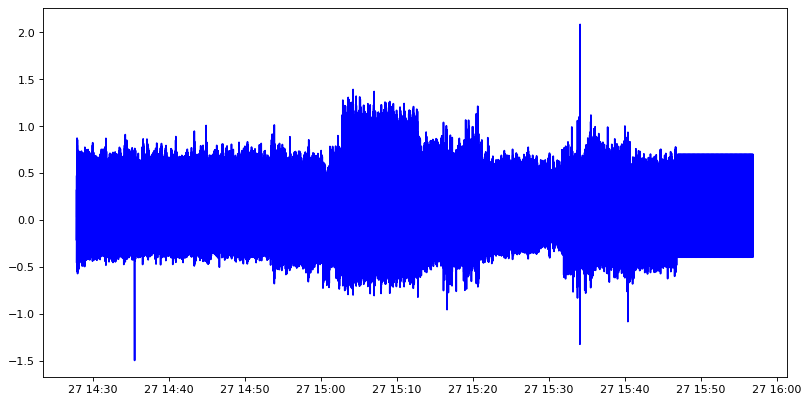

In [8]:
#Попробуем другой метод фильтрации 'biosppy'

df_V5_biosppy = df_V5.copy()
df_V5_biosppy['ECG V5-Ref_cleaned'] = nk.ecg_clean(df_V5['ECG V5-Ref'],method='biosppy', sampling_rate=sampling_rate)

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(df_V5_biosppy['timestamp'], df_V5_biosppy['ECG V5-Ref_cleaned'], label='Value', color='blue')

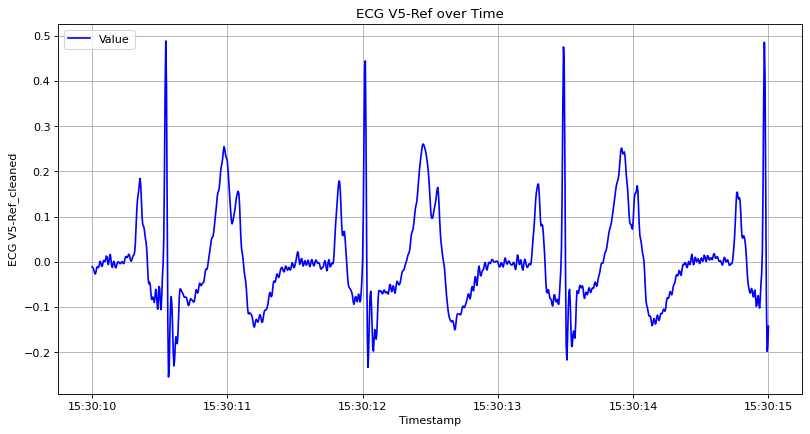

In [9]:
df_V5_biosppy['timestamp'] = pd.to_datetime(df_V5_biosppy['timestamp'])

# Задайте начальную и конечную дату фильтрации
start_date = '2010-12-27 15:30:10'
end_date = '2010-12-27 15:30:15'

# Фильтрация данных по диапазону дат
filtered_df_biosppy = df_V5_biosppy.loc[(df_V5_biosppy['timestamp'] >= start_date) & (df_V5_biosppy['timestamp'] <= end_date), ['ECG V5-Ref_cleaned', 'timestamp']]

# Построение графика для отфильтрованных данных
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(filtered_df_biosppy['timestamp'], filtered_df_biosppy['ECG V5-Ref_cleaned'], label='Value', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('ECG V5-Ref_cleaned')
plt.title('ECG V5-Ref over Time')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
df_V5_biosppy.columns

Index(['ECG V5-Ref', 'timestamp', 'ECG V5-Ref_cleaned'], dtype='object')

In [ ]:
ecg_signal = df_V5_biosppy['ECG V5-Ref_cleaned']

# Используем функцию для сигналов ЭКГ из neurokit2, чтобы найти R-пики
signals, info = nk.ecg_process(ecg_signal, sampling_rate=200)  
r_peaks_indices = info['ECG_R_Peaks']

# Создание столбца для классов, где 1 — R-пик, 0 — остальные
df_V5_biosppy['R_Peak_Class'] = 0
df_V5_biosppy.loc[r_peaks_indices, 'R_Peak_Class'] = 1

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(df_V5_biosppy['timestamp'], df_V5_biosppy['ECG V5-Ref_cleaned'], label='ECG V5-Ref_cleaned', color='blue')

plt.scatter(df_V5_biosppy.loc[r_peaks_indices, 'timestamp'], 
            df_V5_biosppy.loc[r_peaks_indices, 'ECG V5-Ref_cleaned'], 
            color='red', label='R-peaks', zorder=5)

plt.xlabel('Timestamp')
plt.ylabel('ECG V5-Ref_cleaned')
plt.title('ECG Signal with R-peaks')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
start_date = '2010-12-27 15:30:57'
end_date = '2010-12-27 15:31:10'

df_V5_biosppy['timestamp'] = pd.to_datetime(df_V5_biosppy['timestamp'])
filtered_df_biosppy = df_V5_biosppy.loc[(df_V5_biosppy['timestamp'] >= start_date) & (df_V5_biosppy['timestamp'] <= end_date)]

# Находим индексы R-пиков внутри выбранного диапазона
filtered_r_peaks_indices = filtered_df_biosppy.index[filtered_df_biosppy['R_Peak_Class'] == 1]

# Построение графика для отфильтрованных данных
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(filtered_df_biosppy['timestamp'], filtered_df_biosppy['ECG V5-Ref_cleaned'], label='ECG V5-Ref_cleaned', color='blue')

# Визуализация R-пиков для отфильтрованных данных
plt.scatter(filtered_df_biosppy.loc[filtered_r_peaks_indices, 'timestamp'],
            filtered_df_biosppy.loc[filtered_r_peaks_indices, 'ECG V5-Ref_cleaned'],
            color='red', label='R-peaks', zorder=5)

plt.xlabel('Timestamp')
plt.ylabel('ECG V5-Ref_cleaned')
plt.title('ECG V5-Ref over Time with R-peaks')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
ecg_signal = df_V5_biosppy['ECG V5-Ref_cleaned']


_, r_peaks = nk.ecg_peaks(ecg_signal,method='neurokit', sampling_rate=400)  # измените частоту, если она отличается

# Создание столбца для классов, где 1 — R-пик, 0 — остальные
df_V5_biosppy['R_Peak_Class'] = 0
df_V5_biosppy.loc[r_peaks['ECG_R_Peaks'], 'R_Peak_Class'] = 1


start_date = '2010-12-27 15:30:10'
end_date = '2010-12-27 15:30:15'

df_V5_biosppy['timestamp'] = pd.to_datetime(df_V5_biosppy['timestamp'])
filtered_df_biosppy = df_V5_biosppy.loc[(df_V5_biosppy['timestamp'] >= start_date) & (df_V5_biosppy['timestamp'] <= end_date)]

filtered_r_peaks_indices = filtered_df_biosppy.index[filtered_df_biosppy['R_Peak_Class'] == 1]

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(filtered_df_biosppy['timestamp'], filtered_df_biosppy['ECG V5-Ref_cleaned'], label='ECG V5-Ref_cleaned', color='blue')

# Визуализация R-пиков для отфильтрованных данных
plt.scatter(filtered_df_biosppy.loc[filtered_r_peaks_indices, 'timestamp'],
            filtered_df_biosppy.loc[filtered_r_peaks_indices, 'ECG V5-Ref_cleaned'],
            color='red', label='R-peaks', zorder=5)

plt.xlabel('Timestamp')
plt.ylabel('ECG V5-Ref_cleaned')
plt.title('ECG V5-Ref over Time with R-peaks')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
ecg_signal = df_V5_biosppy['ECG V5-Ref_cleaned']

r_info, r_peaks = nk.ecg_peaks(ecg_signal, method='neurokit', sampling_rate=400)

# Создаем столбец для R-пиков
df_V5_biosppy['R_Peak_Class'] = 0
if 'ECG_R_Peaks' in r_peaks:
    df_V5_biosppy.loc[r_peaks['ECG_R_Peaks'], 'R_Peak_Class'] = 1

signals, waves_peak = nk.ecg_delineate(ecg_signal, r_peaks, sampling_rate=400, method="dwt")

# Создание столбцов для классов пиков (по умолчанию 0 для всех)
for peak_type in ['Q', 'S', 'T', 'P']:
    df_V5_biosppy[f'{peak_type}_Peak_Class'] = 0

for wave_type, column_name in [('ECG_Q_Peaks', 'Q_Peak_Class'), 
                               ('ECG_S_Peaks', 'S_Peak_Class'), 
                               ('ECG_T_Peaks', 'T_Peak_Class'), 
                               ('ECG_P_Peaks', 'P_Peak_Class')]:
    if wave_type in waves_peak:
        indices = waves_peak[wave_type]
        if indices is not None:
            indices = np.array(indices)
            indices = indices[~np.isnan(indices)].astype(int)
            df_V5_biosppy.loc[indices, column_name] = 1

In [ ]:
#Нарисуем результаты
start_date = '2010-12-27 15:30:10'
end_date = '2010-12-27 15:30:15'

filtered_df_biosppy = df_V5_biosppy.loc[(df_V5_biosppy['timestamp'] >= start_date) & (df_V5_biosppy['timestamp'] <= end_date)]

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(filtered_df_biosppy['timestamp'], filtered_df_biosppy['ECG V5-Ref_cleaned'], label='ECG V5-Ref_cleaned', color='blue')

colors = {'R': 'red', 'Q': 'green', 'S': 'purple', 'T': 'orange', 'P': 'cyan'}
for peak_name, column_name in [('R', 'R_Peak_Class'), ('Q', 'Q_Peak_Class'), 
                               ('S', 'S_Peak_Class'), ('T', 'T_Peak_Class'), 
                               ('P', 'P_Peak_Class')]:
    indices = filtered_df_biosppy.index[filtered_df_biosppy[column_name] == 1]
    plt.scatter(filtered_df_biosppy.loc[indices, 'timestamp'],
                filtered_df_biosppy.loc[indices, 'ECG V5-Ref_cleaned'],
                color=colors[peak_name], label=f'{peak_name}-Peaks', zorder=5)

plt.xlabel('Timestamp')
plt.ylabel('ECG V5-Ref_cleaned')
plt.title('ECG V5-Ref over Time with Peaks')
# plt.legend()
plt.grid(True)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Установим больше пространства справа для размещения легенды снаружи
plt.tight_layout(rect=[0, 0, 1.2, 1])
plt.show()

In [ ]:
import neurokit2 as nk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools


# Извлечение R-Offsets
r_offsets = waves_peak['ECG_R_Offsets']

# Фильтрация данных в заданном временном диапазоне
start_date = '2010-12-27 15:30:10'
end_date = '2010-12-27 15:30:20'
filtered_df_biosppy = df_V5_biosppy.loc[(df_V5_biosppy['timestamp'] >= start_date) & (df_V5_biosppy['timestamp'] <= end_date)]

# Вычисление RR интервалов на основе R-Offsets
rr_intervals = []
timestamps_rr_intervals = []
for i in range(len(r_offsets) - 1):
    if pd.notna(r_offsets[i]) and pd.notna(r_offsets[i + 1]):
        start_time = df_V5_biosppy.loc[r_offsets[i], 'timestamp']
        end_time = df_V5_biosppy.loc[r_offsets[i + 1], 'timestamp']
        if start_time >= pd.to_datetime(start_date) and end_time <= pd.to_datetime(end_date):
            rr_interval = (r_offsets[i + 1] - r_offsets[i]) / 400  # Рассчитываем разницу в секундах
            rr_intervals.append(rr_interval)
            timestamps_rr_intervals.append((start_time, end_time))

# Создание графика
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(filtered_df_biosppy['timestamp'], filtered_df_biosppy['ECG V5-Ref_cleaned'], label='ECG V5-Ref_cleaned', color='blue')

# Добавление меток пиков
colors = {'R': 'red', 'Q': 'green', 'S': 'purple', 'T': 'orange', 'P': 'cyan'}
for peak_name, column_name in [('R', 'R_Peak_Class'), ('Q', 'Q_Peak_Class'), 
                               ('S', 'S_Peak_Class'), ('T', 'T_Peak_Class'), 
                               ('P', 'P_Peak_Class')]:
    indices = filtered_df_biosppy.index[filtered_df_biosppy[column_name] == 1]
    plt.scatter(filtered_df_biosppy.loc[indices, 'timestamp'],
                filtered_df_biosppy.loc[indices, 'ECG V5-Ref_cleaned'],
                color=colors[peak_name], label=f'{peak_name}-Peaks', zorder=5)

# Создание цикла по цветам
color_cycle = itertools.cycle(plt.cm.tab10.colors)

# Добавление RR интервалов на основе R-Offsets
for start_rr, end_rr in timestamps_rr_intervals:
    color = next(color_cycle)
    plt.axvspan(start_rr, end_rr, color=color, alpha=0.3, label='RR интервал' if start_rr == timestamps_rr_intervals[0][0] else "")

# Настройка графика
plt.xlabel('Timestamp')
plt.ylabel('ECG V5-Ref_cleaned')
plt.title('ECG V5-Ref over Time with Peaks and RR Intervals')
plt.grid(True)

# Добавим легенду
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Установим больше пространства справа для размещения легенды снаружи
plt.tight_layout(rect=[0, 0, 1.2, 1])
plt.show()

In [ ]:
import neurokit2 as nk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Предполагается, что df_V5_biosppy и другие данные уже загружены

# Извлечение сигнала ЭКГ
ecg_signal = df_V5_biosppy['ECG V5-Ref_cleaned']

# Определение R-пиков
r_info, r_peaks = nk.ecg_peaks(ecg_signal, method='neurokit', sampling_rate=400)

# Создаем столбец для R-пиков
df_V5_biosppy['R_Peak_Class'] = 0
if 'ECG_R_Peaks' in r_peaks:
    df_V5_biosppy.loc[r_peaks['ECG_R_Peaks'], 'R_Peak_Class'] = 1

# Деленеация волн ЭКГ
signals, waves_peak = nk.ecg_delineate(ecg_signal, r_peaks, sampling_rate=400, method="dwt")

# Создание столбцов для классов пиков (по умолчанию 0 для всех)
for peak_type in ['Q', 'S', 'T', 'P']:
    df_V5_biosppy[f'{peak_type}_Peak_Class'] = 0

for wave_type, column_name in [('ECG_Q_Peaks', 'Q_Peak_Class'), 
                               ('ECG_S_Peaks', 'S_Peak_Class'), 
                               ('ECG_T_Peaks', 'T_Peak_Class'), 
                               ('ECG_P_Peaks', 'P_Peak_Class')]:
    if wave_type in waves_peak:
        indices = waves_peak[wave_type]
        if indices is not None:
            indices = np.array(indices)
            indices = indices[~np.isnan(indices)].astype(int)
            df_V5_biosppy.loc[indices, column_name] = 1

# Извлечение R-Offsets и P-пиков
r_offsets = waves_peak['ECG_R_Offsets']
p_peaks = waves_peak['ECG_P_Peaks']

# Фильтрация данных в заданном временном диапазоне
start_date = '2010-12-27 15:30:9'
end_date = '2010-12-27 15:30:20'
filtered_df_biosppy = df_V5_biosppy.loc[(df_V5_biosppy['timestamp'] >= start_date) & (df_V5_biosppy['timestamp'] <= end_date)]

# Вычисление RR интервалов на основе R-Offsets
rr_intervals = []
timestamps_rr_intervals = []
for i in range(len(r_offsets) - 1):
    if pd.notna(r_offsets[i]) and pd.notna(r_offsets[i + 1]):
        start_time = df_V5_biosppy.loc[r_offsets[i], 'timestamp']
        end_time = df_V5_biosppy.loc[r_offsets[i + 1], 'timestamp']
        if start_time >= pd.to_datetime(start_date) and end_time <= pd.to_datetime(end_date):
            rr_interval = (r_offsets[i + 1] - r_offsets[i]) / 400  # Рассчитываем разницу в секундах
            rr_intervals.append(rr_interval)
            timestamps_rr_intervals.append((start_time, end_time))

# Вычисление PP интервалов на основе P-пиков
pp_intervals = []
timestamps_pp_intervals = []
for i in range(len(p_peaks) - 1):
    if pd.notna(p_peaks[i]) and pd.notna(p_peaks[i + 1]):
        start_time = df_V5_biosppy.loc[p_peaks[i], 'timestamp']
        end_time = df_V5_biosppy.loc[p_peaks[i + 1], 'timestamp']
        if start_time >= pd.to_datetime(start_date) and end_time <= pd.to_datetime(end_date):
            pp_interval = (p_peaks[i + 1] - p_peaks[i]) / 400  # Рассчитываем разницу в секундах
            pp_intervals.append(pp_interval)
            timestamps_pp_intervals.append((start_time, end_time))

# Создание сабплотов
fig, axs = plt.subplots(2, 1, figsize=(12, 8), dpi=80)

# График для RR интервалов
axs[0].plot(filtered_df_biosppy['timestamp'], filtered_df_biosppy['ECG V5-Ref_cleaned'], label='ECG V5-Ref_cleaned', color='blue')
colors = {'R': 'red', 'Q': 'green', 'S': 'purple', 'T': 'orange', 'P': 'cyan'}
for peak_name, color in colors.items():
    indices = filtered_df_biosppy.index[filtered_df_biosppy[f'{peak_name}_Peak_Class'] == 1]
    axs[0].scatter(filtered_df_biosppy.loc[indices, 'timestamp'],
                   filtered_df_biosppy.loc[indices, 'ECG V5-Ref_cleaned'],
                   color=color, label=f'{peak_name}-Peaks', zorder=5)

color_cycle = itertools.cycle(plt.cm.tab10.colors)
for start_rr, end_rr in timestamps_rr_intervals:
    color = next(color_cycle)
    axs[0].axvspan(start_rr, end_rr, color=color, alpha=0.3, label='RR интервал' if start_rr == timestamps_rr_intervals[0][0] else "")

axs[0].set_title('ECG V5-Ref with RR Intervals')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('ECG V5-Ref_cleaned')
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[0].grid(True)

# График для PP интервалов
axs[1].plot(filtered_df_biosppy['timestamp'], filtered_df_biosppy['ECG V5-Ref_cleaned'], label='ECG V5-Ref_cleaned', color='blue')
colors = {'R': 'red', 'Q': 'green', 'S': 'purple', 'T': 'orange', 'P': 'cyan'}
for peak_name, color in colors.items():
    indices = filtered_df_biosppy.index[filtered_df_biosppy[f'{peak_name}_Peak_Class'] == 1]
    axs[1].scatter(filtered_df_biosppy.loc[indices, 'timestamp'],
                   filtered_df_biosppy.loc[indices, 'ECG V5-Ref_cleaned'],
                   color=color, label=f'{peak_name}-Peaks', zorder=5)
    
color_cycle = itertools.cycle(plt.cm.tab10.colors)
for start_pp, end_pp in timestamps_pp_intervals:
    color = next(color_cycle)
    axs[1].axvspan(start_pp, end_pp, color=color, alpha=0.3, label='PP интервал' if start_pp == timestamps_pp_intervals[0][0] else "")

axs[1].set_title('ECG V5-Ref with PP Intervals')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('ECG V5-Ref_cleaned')
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[1].grid(True)

# Установим больше пространства справа для размещения легенды снаружи
plt.tight_layout(rect=[0, 0, 1.2, 1])
plt.show()

In [ ]:
import neurokit2 as nk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Предполагается, что df_V5_biosppy и другие данные уже загружены

# Извлечение сигнала ЭКГ
ecg_signal = df_V5_biosppy['ECG V5-Ref_cleaned']

# Определение R-пиков
r_info, r_peaks = nk.ecg_peaks(ecg_signal, method='neurokit', sampling_rate=400)

# Создаем столбец для R-пиков
df_V5_biosppy['R_Peak_Class'] = 0
if 'ECG_R_Peaks' in r_peaks:
    df_V5_biosppy.loc[r_peaks['ECG_R_Peaks'], 'R_Peak_Class'] = 1

# Деленеация волн ЭКГ
signals, waves_peak = nk.ecg_delineate(ecg_signal, r_peaks, sampling_rate=400, method="dwt")

# Создание столбцов для классов пиков (по умолчанию 0 для всех)
for peak_type in ['Q', 'S', 'T', 'P']:
    df_V5_biosppy[f'{peak_type}_Peak_Class'] = 0

for wave_type, column_name in [('ECG_Q_Peaks', 'Q_Peak_Class'), 
                               ('ECG_S_Peaks', 'S_Peak_Class'), 
                               ('ECG_T_Peaks', 'T_Peak_Class'), 
                               ('ECG_P_Peaks', 'P_Peak_Class')]:
    if wave_type in waves_peak:
        indices = waves_peak[wave_type]
        if indices is not None:
            indices = np.array(indices)
            indices = indices[~np.isnan(indices)].astype(int)
            df_V5_biosppy.loc[indices, column_name] = 1

# Извлечение нужных компонентов
p_onsets = waves_peak['ECG_P_Onsets']
p_offsets = waves_peak['ECG_P_Offsets']
q_peaks = waves_peak['ECG_Q_Peaks']
t_onsets = waves_peak['ECG_T_Onsets']
t_offsets = waves_peak['ECG_T_Offsets']

# Фильтрация данных в заданном временном диапазоне
start_date = '2010-12-27 15:30:10'
end_date = '2010-12-27 15:30:15'
filtered_df_biosppy = df_V5_biosppy.loc[(df_V5_biosppy['timestamp'] >= start_date) & (df_V5_biosppy['timestamp'] <= end_date)]

# Вспомогательная функция для расчета интервалов
def calculate_intervals(start_indices, end_indices, label, info_list):
    for i in range(len(start_indices)):
        if pd.notna(start_indices[i]) and pd.notna(end_indices[i]):
            start_time = df_V5_biosppy.loc[start_indices[i], 'timestamp']
            end_time = df_V5_biosppy.loc[end_indices[i], 'timestamp']
            if start_time >= pd.to_datetime(start_date) and end_time <= pd.to_datetime(end_date):
                interval_duration = (end_indices[i] - start_indices[i]) / 400  # Рассчитываем разницу в секундах
                info_list.append((start_time, end_time, interval_duration))

# Вычисление P-duration
p_durations = []
calculate_intervals(p_onsets, p_offsets, 'P-duration', p_durations)

# Вычисление PR-segment
pr_segments = []
calculate_intervals(p_offsets, q_peaks, 'PR-segment', pr_segments)

# Вычисление PR-interval
pr_intervals = []
calculate_intervals(p_onsets, q_peaks, 'PR-interval', pr_intervals)

# Вычисление QRS-duration
qrs_durations = []
calculate_intervals(q_peaks, t_onsets, 'QRS-duration', qrs_durations)

# Вычисление ST-T-segment
st_t_segments = []
calculate_intervals(t_onsets, t_offsets, 'ST-T-segment', st_t_segments)

# Вычисление TP-interval
tp_intervals = []
for i in range(len(t_offsets)):
    if pd.notna(t_offsets[i]) and i < len(p_onsets) - 1 and pd.notna(p_onsets[i + 1]):
        start_time = df_V5_biosppy.loc[t_offsets[i], 'timestamp']
        end_time = df_V5_biosppy.loc[p_onsets[i + 1], 'timestamp']
        if start_time >= pd.to_datetime(start_date) and end_time <= pd.to_datetime(end_date):
            interval_duration = (p_onsets[i + 1] - t_offsets[i]) / 400 - 1  # Рассчитываем разницу в секундах
            tp_intervals.append((start_time, end_time, interval_duration))

# Создание сабплотов
fig, axs = plt.subplots(3, 2, figsize=(14, 12), dpi=80)
axs = axs.flatten()

# Добавление и визуализация для каждого интервала
interval_infos = [
    ("P-duration", p_durations),
    ("PR-segment", pr_segments),
    ("PR-interval", pr_intervals),
    ("QRS-duration", qrs_durations),
    ("ST-T-segment", st_t_segments),
    ("TP-interval", tp_intervals),
]

for idx, (name, info_list) in enumerate(interval_infos):
    axs[idx].plot(filtered_df_biosppy['timestamp'], filtered_df_biosppy['ECG V5-Ref_cleaned'], label='ECG V5-Ref_cleaned', color='blue')
    color_cycle = itertools.cycle(plt.cm.tab10.colors)
    for start_time, end_time, _ in info_list:
        color = next(color_cycle)
        axs[idx].axvspan(start_time, end_time, color=color, alpha=0.3, label=name if start_time == info_list[0][0] else "")
    axs[idx].set_title(f'ECG V5-Ref with {name}')
    axs[idx].set_xlabel('Timestamp')
    axs[idx].set_ylabel('ECG V5-Ref_cleaned')
    axs[idx].grid(True)
    axs[idx].legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.tight_layout(rect=[0, 0, 1.2, 1])
plt.show()

In [ ]:
import neurokit2 as nk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Предполагается, что df_V5_biosppy и другие данные уже загружены

# Извлечение сигнала ЭКГ
ecg_signal = df_V5_biosppy['ECG V5-Ref_cleaned']

# Определение R-пиков
r_info, r_peaks = nk.ecg_peaks(ecg_signal, method='neurokit', sampling_rate=400)

# Создаем столбец для R-пиков
df_V5_biosppy['R_Peak_Class'] = 0
if 'ECG_R_Peaks' in r_peaks:
    df_V5_biosppy.loc[r_peaks['ECG_R_Peaks'], 'R_Peak_Class'] = 1

# Деленеация волн ЭКГ
signals, waves_peak = nk.ecg_delineate(ecg_signal, r_peaks, sampling_rate=400, method="dwt")

# Создание столбцов для классов пиков (по умолчанию 0 для всех)
for peak_type in ['Q', 'S', 'T', 'P']:
    df_V5_biosppy[f'{peak_type}_Peak_Class'] = 0

for wave_type, column_name in [('ECG_Q_Peaks', 'Q_Peak_Class'), 
                               ('ECG_S_Peaks', 'S_Peak_Class'), 
                               ('ECG_T_Peaks', 'T_Peak_Class'), 
                               ('ECG_P_Peaks', 'P_Peak_Class')]:
    if wave_type in waves_peak:
        indices = waves_peak[wave_type]
        if indices is not None:
            indices = np.array(indices)
            indices = indices[~np.isnan(indices)].astype(int)
            df_V5_biosppy.loc[indices, column_name] = 1

# Извлечение нужных компонентов
r_offsets = waves_peak['ECG_R_Offsets']
p_peaks = waves_peak['ECG_P_Peaks']
p_onsets = waves_peak['ECG_P_Onsets']
p_offsets = waves_peak['ECG_P_Offsets']
q_peaks = waves_peak['ECG_Q_Peaks']
t_onsets = waves_peak['ECG_T_Onsets']
t_offsets = waves_peak['ECG_T_Offsets']

# Фильтрация данных в заданном временном диапазоне
start_date = '2010-12-27 15:30:10'
end_date = '2010-12-27 15:30:20'
filtered_df_biosppy = df_V5_biosppy.loc[(df_V5_biosppy['timestamp'] >= start_date) & (df_V5_biosppy['timestamp'] <= end_date)]

# Вспомогательная функция для расчета интервалов
def calculate_intervals(start_indices, end_indices, info_list):
    for i in range(min(len(start_indices), len(end_indices))):
        if pd.notna(start_indices[i]) and pd.notna(end_indices[i]):
            start_time = df_V5_biosppy.loc[start_indices[i], 'timestamp']
            end_time = df_V5_biosppy.loc[end_indices[i], 'timestamp']
            if start_time >= pd.to_datetime(start_date) and end_time <= pd.to_datetime(end_date):
                interval_duration = (end_indices[i] - start_indices[i]) / 400  # Рассчитываем разницу в секундах
                info_list.append((start_time, end_time, interval_duration))

# Вычисление интервалов
rr_intervals = []
timestamps_rr_intervals = []
for i in range(len(r_offsets) - 1):
    if pd.notna(r_offsets[i]) and pd.notna(r_offsets[i + 1]):
        start_time = df_V5_biosppy.loc[r_offsets[i], 'timestamp']
        end_time = df_V5_biosppy.loc[r_offsets[i + 1], 'timestamp']
        if start_time >= pd.to_datetime(start_date) and end_time <= pd.to_datetime(end_date):
            timestamps_rr_intervals.append((start_time, end_time))

pp_intervals = []
for i in range(len(p_peaks) - 1):
    if pd.notna(p_peaks[i]) and pd.notna(p_peaks[i + 1]):
        start_time = df_V5_biosppy.loc[p_peaks[i], 'timestamp']
        end_time = df_V5_biosppy.loc[p_peaks[i + 1], 'timestamp']
        if start_time >= pd.to_datetime(start_date) and end_time <= pd.to_datetime(end_date):
            pp_intervals.append((start_time, end_time))

# Вычисление P-duration
p_durations = []
calculate_intervals(p_onsets, p_offsets, p_durations)

# Вычисление PR-segment
pr_segments = []
calculate_intervals(p_offsets, q_peaks, pr_segments)

# Вычисление PR-interval
pr_intervals = []
calculate_intervals(p_onsets, q_peaks, pr_intervals)

# Вычисление QRS-duration
qrs_durations = []
calculate_intervals(q_peaks, t_onsets, qrs_durations)

# Вычисление ST-T-segment
st_t_segments = []
calculate_intervals(t_onsets, t_offsets, st_t_segments)

# Вычисление TP-interval
tp_intervals = []
for i in range(len(t_offsets)):
    if pd.notna(t_offsets[i]) and i < len(p_onsets) - 1 and pd.notna(p_onsets[i + 1]):
        start_time = df_V5_biosppy.loc[t_offsets[i], 'timestamp']
        end_time = df_V5_biosppy.loc[p_onsets[i + 1], 'timestamp']
        if start_time >= pd.to_datetime(start_date) and end_time <= pd.to_datetime(end_date):
            interval_duration = (p_onsets[i + 1] - t_offsets[i]) / 400 - 1
            tp_intervals.append((start_time, end_time, interval_duration))

# Создание сабплотов
fig, axs = plt.subplots(4, 2, figsize=(16, 18), dpi=80)
axs = axs.flatten()

# Цвета для пиков
colors = {'R': 'red', 'Q': 'green', 'S': 'purple', 'T': 'orange', 'P': 'cyan'}

# Добавление и визуализация для каждого интервала
interval_infos = [
    ("RR Intervals", timestamps_rr_intervals),
    ("PP Intervals", pp_intervals),
    ("P-duration", [(s, e) for s, e, _ in p_durations]),
    ("PR-segment", [(s, e) for s, e, _ in pr_segments]),
    ("PR-interval", [(s, e) for s, e, _ in pr_intervals]),
    ("QRS-duration", [(s, e) for s, e, _ in qrs_durations]),
    ("ST-T-segment", [(s, e) for s, e, _ in st_t_segments]),
    ("TP-interval", [(s, e) for s, e, _ in tp_intervals]),
]

for idx, (name, info_list) in enumerate(interval_infos):
    axs[idx].plot(filtered_df_biosppy['timestamp'], filtered_df_biosppy['ECG V5-Ref_cleaned'], label='ECG V5-Ref_cleaned', color='blue')

    # Отметка пиков
    for peak_name, color in colors.items():
        indices = filtered_df_biosppy.index[filtered_df_biosppy[f'{peak_name}_Peak_Class'] == 1]
        axs[idx].scatter(filtered_df_biosppy.loc[indices, 'timestamp'],
                         filtered_df_biosppy.loc[indices, 'ECG V5-Ref_cleaned'],
                         color=color, label=f'{peak_name}-Peaks', zorder=5)

    # Интервалы
    color_cycle = itertools.cycle(plt.cm.tab10.colors)
    for start_time, end_time in info_list:
        color = next(color_cycle)
        axs[idx].axvspan(start_time, end_time, color=color, alpha=0.3, label=name if start_time == info_list[0][0] else "")

    axs[idx].set_title(f'ECG V5-Ref with {name}')
    axs[idx].set_xlabel('Timestamp')
    axs[idx].set_ylabel('ECG V5-Ref_cleaned')
    axs[idx].grid(True)
    axs[idx].legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.tight_layout(rect=[0, 0, 1.2, 1])
plt.show()

In [ ]:
pr_segments